# System check
## systems
- initial velocity for 1 LJ-particle on other with no inital velocity 
    - in box 
    - free
    - pbc


In [1]:
%matplotlib notebook
import numpy as np
from numba import jit
from potentials import *
from distances import *
from sampling import *
from integrators import *
from optimize import *
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

### harmonic potantial
- 1 particle 

In [ ]:
def pot_grad(position, boxsize = (0., 1.), sig = 1., eps = 1., pbc = False):
    vecs = vectors(position, boxsize, pbc = False)
    return gradients.harmonic(position, boxsize)
def pot(position, boxsize = (0., 1.), sig = 1., eps = 1., pbc = False):
    vecs = vectors(position, boxsize, pbc)
    dist = distances(vecs)
    return potentials.harmonic(position, boxsize)

position_init = mcmc(potentials.LJ, 1, 2, 100, 0.01)
velocity_init = np.zeros_like(position_init)
velocity_init[0] = [0., 0.]

position_matrix, velocity_matrix, acceleration_matrix = vv(pot_grad, position_init, velocity_init, 1, 1000, 0.001, (0, 1))

In [ ]:
#plt.plot(position_matrix[:,0, 0], position_matrix[:,0,1])
print(position_init)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
r_init = position_matrix[0]
print(r_init)
r_matrix = position_matrix
v_matrix = velocity_matrix
colors = np.arange(len(r_init))
scat = ax.scatter(r_init[:,0], r_init[:,1], c=colors)
circles = [plt.Circle(r, radius=0.5, fill=False) for i,r in enumerate(r_init)]
for c in circles:
    plt.gca().add_patch(c)
qax = ax.quiver(r_matrix[0,:,0], r_matrix[0,:,1], v_matrix[1,:,0], v_matrix[1,:,1],np.arange(len(r_init)),scale=50, width=0.005)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.plot(position_matrix[:,0, 0], position_matrix[:,0,1])
def animate(i):
    index = 4*i
    data = r_matrix[index]
    scat.set_offsets(data)
    for i, c in enumerate(circles):
        c.center = data[i]
    qax.set_UVC(v_matrix[index,:,0],v_matrix[index,:,1])
    qax.set_offsets(data)
    return scat,

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, bitrate=1800)
anim = animation.FuncAnimation(fig, animate, interval=1, repeat=False)
#anim.save('LJ_Harmonic_Particles.mp4', writer=writer)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
colors = np.arange(len(position_init))
scat = ax.scatter(position_init[:,0], position_init[:,1], c=colors)
circles = [plt.Circle(r, radius=0.5, fill=False) for i,r in enumerate(position_init)]
for c in circles:
    plt.gca().add_patch(c)
qax = ax.quiver(position_matrix[0,:,0], position_matrix[0,:,1], velocity_matrix[1,:,0], velocity_matrix[1,:,1],np.arange(len(position_init)),scale=50, width=0.005)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
def animate(i):
    index = i
    data = position_matrix[index]
    scat.set_offsets(data)
    for i, c in enumerate(circles):
        c.center = data[i]
    qax.set_UVC(velocity_matrix[index,:,0],velocity_matrix[index,:,1])
    qax.set_offsets(data)
    return scat,

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, bitrate=1800)
anim = animation.FuncAnimation(fig, animate, interval=1)#, frames=70, repeat=False)
#anim.save('LJ_Harmonic_Particles.mp4', writer=writer)

### LJ-potential
- problem particle sind nach mcmc 
- versuche mit optimizer

In [ ]:
def pot_grad(position, boxsize = (0., 1.), sig = 1, eps = 1, pbc = False):
    vecs = vectors(position, boxsize, pbc = False)
    return gradients.LJ(vecs, eps, sig)
def pot(position, boxsize = (0., 1.), sig = 1, eps = 1, pbc = False):
    vecs = vectors(position, boxsize, pbc)
    dist = distances(vecs)
    return potentials.LJ(dist, eps, sig)

position_mcmc = mcmc(pot, 6, 2, 100, 0.001)
print(position_mcmc)

In [ ]:
position_init = descent(position_mcmc*5, pot_grad)[0][-1]
position_init[0] = [10., 3.]
velocity_init = np.zeros_like(position_init)
velocity_init[0] = [-5., 0.]
print(position_init)
#print(distances(vectors(position_init, boxsize=(0,1))))

In [ ]:
position_matrix, velocity_matrix, acceleration_matrix = euler(pot_grad, position_init, velocity_init, 1, 100, 1e-3, (0, 1))

In [ ]:
#print(position_init)
print(position_matrix[0:3])
#print(velocity_init)
print(velocity_matrix[0:3])

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
r_init = position_matrix[0]
print(r_init)
r_matrix = position_matrix
v_matrix = velocity_matrix
colors = np.arange(len(r_init))
scat = ax.scatter(r_init[:,0], r_init[:,1], c=colors)
circles = [plt.Circle(r, radius=0.5, fill=False) for i,r in enumerate(r_init)]
for c in circles:
    plt.gca().add_patch(c)
qax = ax.quiver(r_matrix[0,:,0], r_matrix[0,:,1], v_matrix[1,:,0], v_matrix[1,:,1],np.arange(len(r_init)),scale=50, width=0.005)
ax.set_xlim(-5, 20)
ax.set_ylim(-5, 20)
ax.plot(position_matrix[:,0, 0], position_matrix[:,0,1])
def animate(i):
    index = 4*i
    data = r_matrix[index]
    scat.set_offsets(data)
    for i, c in enumerate(circles):
        c.center = data[i]
    qax.set_UVC(v_matrix[index,:,0],v_matrix[index,:,1])
    qax.set_offsets(data)
    return scat,

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, bitrate=1800)
anim = animation.FuncAnimation(fig, animate, interval=1, repeat=False)
#anim.save('LJ_Harmonic_Particles.mp4', writer=writer)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
colors = np.arange(len(position_init))
scat = ax.scatter(position_init[:,0], position_init[:,1], c=colors)
circles = [plt.Circle(r, radius=0.5, fill=False) for i,r in enumerate(position_init)]
for c in circles:
    plt.gca().add_patch(c)
qax = ax.quiver(position_matrix[0,:,0], position_matrix[0,:,1], velocity_matrix[1,:,0], velocity_matrix[1,:,1],np.arange(len(position_init)),scale=50, width=0.005)
ax.set_xlim(-5, 20)
ax.set_ylim(-5, 20)
def animate(i):
    index = i
    data = position_matrix[index]
    scat.set_offsets(data)
    for i, c in enumerate(circles):
        c.center = data[i]
    qax.set_UVC(velocity_matrix[index,:,0],velocity_matrix[index,:,1])
    qax.set_offsets(data)
    return scat,

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, bitrate=1800)
anim = animation.FuncAnimation(fig, animate, interval=1)#, frames=70, repeat=False)
#anim.save('LJ_Harmonic_Particles.mp4', writer=writer)

### particle in box
- LJ + barrier potential 

In [25]:
def pot_grad(position, pbc = False, boxsize = (-5., 5.), sig = 1, eps = 1):
    vecs = vectors(position, boxsize, pbc = False)
    return gradients.LJ(vecs, eps, sig) + gradients.pot_barrier(position, boxsize)
def pot(position, sig = 1, eps = 1, boxsize = (-5, 5), pbc = False):
    vecs = vectors(position, boxsize, pbc)
    dist = distances(vecs)
    #print(potentials.pot_barrier(position, boxsize))
    return potentials.LJ(dist, eps, sig) + potentials.pot_barrier(position, boxsize)

position_init = mcmc(pot, 10, 2, 100, 0.001, boxsize = (-5, 5))


In [26]:
position_init = descent(position_init, pot_grad, boxsize=(-5,5))[0][-1]


In [27]:
position_init[0] = [10., 0.]
velocity_init = np.zeros_like(position_init)
velocity_init[0] = [-3., 0.]
#print(position_init)
#print(distances(vectors(position_init, boxsize=(0,1))))

In [28]:
position_matrix, velocity_matrix, acceleration_matrix = vv(pot_grad, position_init, velocity_init, 1, 10, 1e-4, (-5, 5))

<IPython.core.display.Javascript object>


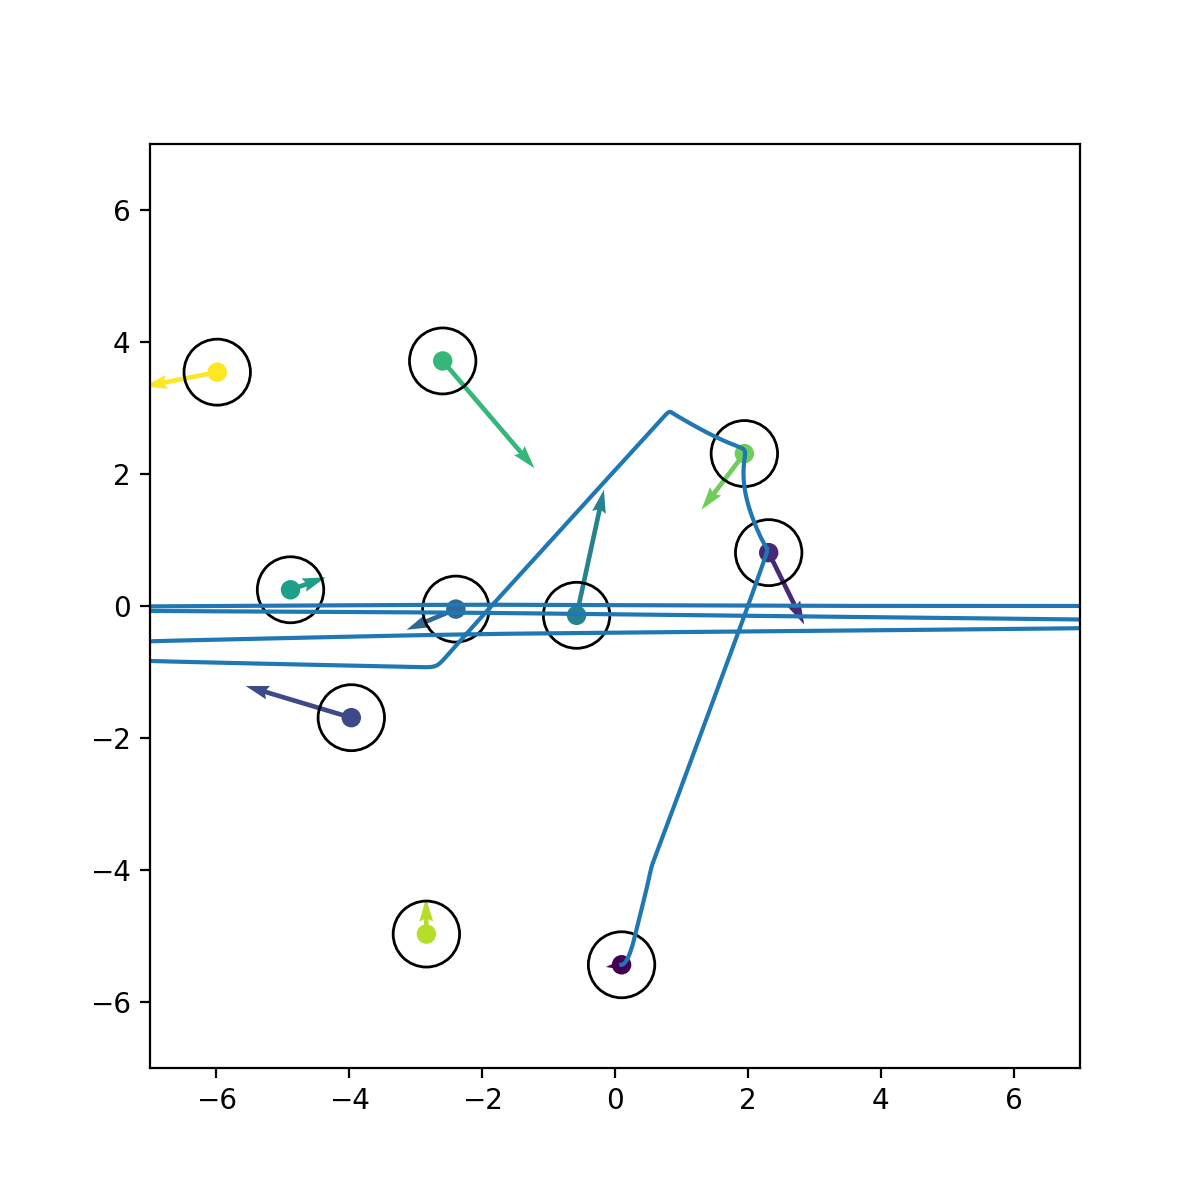

[[10.          0.        ]
 [ 3.79328799  1.70703735]
 [-1.49285024 -3.59195151]
 [ 0.67389414  3.7891105 ]
 [-1.72151642 -2.49671422]
 [-1.9561066  -1.40273046]
 [ 3.37493535 -4.93957323]
 [ 3.90155418  3.89439735]
 [-2.5580458  -3.24515614]
 [ 3.60796158  2.81258463]]


In [29]:
fig, ax = plt.subplots(figsize=(6, 6))
r_init = position_matrix[0]
print(r_init)
r_matrix = position_matrix
v_matrix = velocity_matrix
colors = np.arange(len(r_init))
scat = ax.scatter(r_init[:,0], r_init[:,1], c=colors)
circles = [plt.Circle(r, radius=0.5, fill=False) for i,r in enumerate(r_init)]
for c in circles:
    plt.gca().add_patch(c)
qax = ax.quiver(r_matrix[0,:,0], r_matrix[0,:,1], v_matrix[1,:,0], v_matrix[1,:,1],np.arange(len(r_init)),scale=50, width=0.005)
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.plot(position_matrix[:,0, 0], position_matrix[:,0,1])
def animate(i):
    index = 40*i
    data = r_matrix[index]
    scat.set_offsets(data)
    for i, c in enumerate(circles):
        c.center = data[i]
    qax.set_UVC(v_matrix[index,:,0],v_matrix[index,:,1])
    qax.set_offsets(data)
    return scat,

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=25, bitrate=1800)
anim = animation.FuncAnimation(fig, animate, interval=1, repeat=False)
#anim.save('LJ_Harmonic_Particles.mp4', writer=writer)